# Importing the important library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Data Generation

In [2]:
# 1000 observations

observation = 1000

xs = np.random.uniform(low=-10, high=10, size=(observation,1))
zs = np.random.uniform(low=-10, high=10, size=(observation,1))

generated_input = np.column_stack((xs,zs))

noise  = np.random.uniform(1,-1,(observation,1))

generated_targets = 2*xs - 5*zs + 5 + noise

np.savez('TF_intro', inputs = generated_input, target = generated_targets)

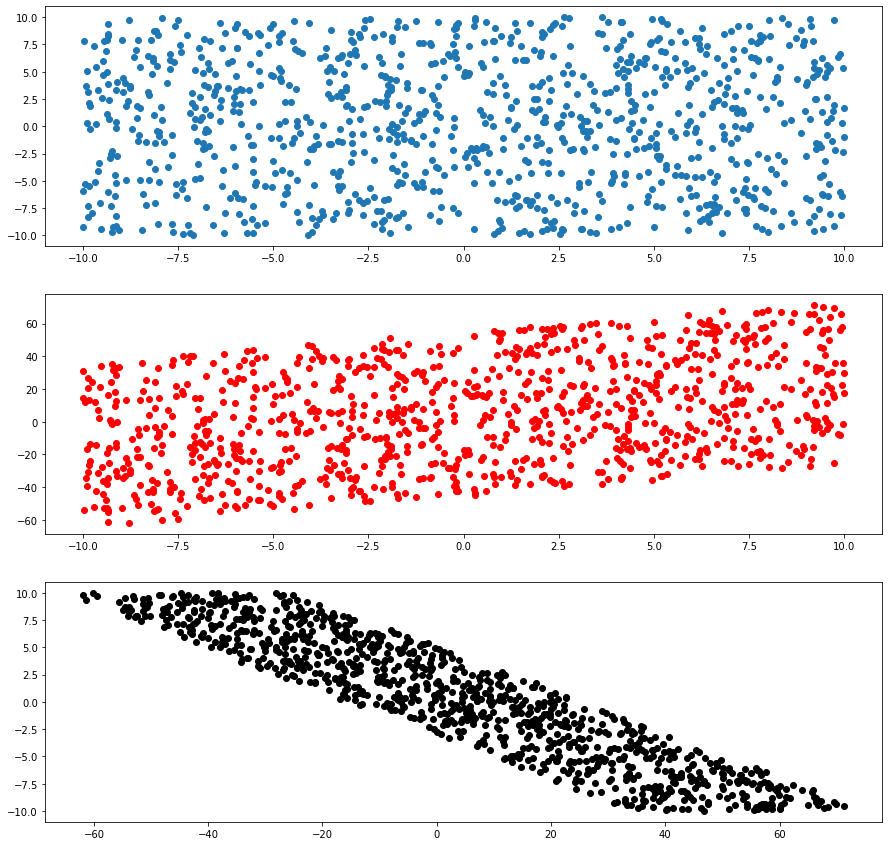

In [3]:
plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.scatter(xs,zs)

plt.subplot(3,1,2)
plt.scatter(xs,generated_targets, color='r')

plt.subplot(3,1,3)
plt.scatter(generated_targets,zs, color='black')


# Solving with Tensor Flow

In [4]:
training_data = np.load('TF_intro.npz')

In [5]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

model.fit(training_data['inputs'], training_data['target'], epochs = 100, verbose=0)

# Extracting the weights and bias

In [6]:
model.layers[0].get_weights()

[array([[ 2.0157504],
        [-4.977583 ]], dtype=float32),
 array([5.0233207], dtype=float32)]

In [7]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0157504],
       [-4.977583 ]], dtype=float32)

In [8]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0233207], dtype=float32)

# Extract the outputs and make predictions

In [9]:
input_prediction = model.predict_on_batch(training_data['inputs'])

In [10]:
target_1 = training_data['target']

# plotting the data

<function matplotlib.pyplot.show(*args, **kw)>

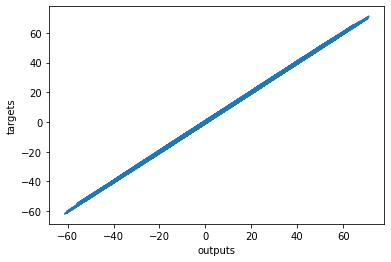

In [14]:
plt.plot(np.squeeze(input_prediction), np.squeeze(target_1))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show